# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.cluster import KMeans
from sklearn import metrics

## Load the Data

In [2]:
df = pd.read_csv('Traffic_Accidents.csv')


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [7]:
df.sample(5)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
21980,488430.0,413240.0,-0.664915,53.608254,16,2.0,2,1.0,20/07/2007,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine with high winds,Dry,1.0,Yes,2007
13761,617930.0,217740.0,1.160448,51.815726,42,3.0,2,1.0,23/10/2007,3,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2007
34378,333360.0,188970.0,-2.963481,51.595571,61,1.0,2,6.0,17/09/2007,2,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2007
34974,408020.0,288970.0,-1.883301,52.498547,20,3.0,1,1.0,25/08/2005,5,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2005
8431,493169.0,100238.0,-0.679447,50.794162,47,3.0,1,1.0,23/08/2013,6,...,6,0,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,1.0,No,2013


In [8]:
df.shape

(52000, 26)

In [10]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,51678.000000,52000.000000,50959.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51912.000000,52000.000000
mean,440284.256846,2.998617e+05,-1.427193,52.586684,30.401712,2.837145,1.834327,1.354756,4.130712,349.542558,4.080519,997.078077,39.148558,2.672673,384.503058,1.359397,2009.401788
std,95109.751221,1.613624e+05,1.398249,1.453049,25.545581,0.402582,0.727856,0.855220,1.926217,259.504721,1.428056,1806.405065,14.212826,3.205080,1304.989395,0.479868,3.006997
min,98480.000000,1.903000e+04,-6.895268,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,15.000000,-1.000000,-1.000000,1.000000,2005.000000
25%,375540.000000,1.780100e+05,-2.366190,51.487676,7.000000,3.000000,1.000000,1.000000,2.000000,112.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2006.000000
50%,440950.000000,2.671800e+05,-1.391202,52.295042,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,4.000000,128.500000,30.000000,3.000000,0.000000,1.000000,2010.000000
75%,523500.000000,3.981492e+05,-0.214666,53.478016,46.000000,3.000000,2.000000,1.000000,6.000000,530.000000,6.000000,716.000000,50.000000,6.000000,0.000000,2.000000,2012.000000
max,654960.000000,1.203900e+06,1.753632,60.714774,98.000000,3.000000,34.000000,51.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,3.000000,2014.000000


In [12]:
df.isna().sum() # Check if there null values

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


In [13]:
df['Accident_Severity'].fillna(df['Accident_Severity'].mean(), inplace=True)
df['Accident_Severity'].isna().sum()

0

In [14]:
df['Number_of_Casualties'].fillna(df['Number_of_Casualties'].mean(), inplace=True)
df['Number_of_Casualties'].isna().sum()

0

In [16]:
df['Light_Conditions'].fillna(df['Light_Conditions'].mode()[0], inplace=True)
df['Light_Conditions'].isna().sum()

0

In [17]:
df['Urban_or_Rural_Area'].fillna(df['Urban_or_Rural_Area'].mean(), inplace=True)
df['Urban_or_Rural_Area'].isna().sum()

0

## ^ I got rid of Null values ​​by filling them.

In [20]:
df.duplicated().sum()

45

In [26]:
df.drop_duplicates(inplace=True)

In [27]:
df.duplicated().sum()

0

## ^ I got rid of duplicate values ​​by dropping them.

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [46]:
X = df.drop(['Accident_Severity'], axis=1)
y = df['Accident_Severity']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [42]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [48]:
enc = ce.OrdinalEncoder(cols=['Date', 'Local_Authority_(Highway)', 'Road_Type', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Did_Police_Officer_Attend_Scene_of_Accident'])
X_train = enc.fit_transform(X_train)
X_test = enc.transform(X_test)

In [50]:
X_train.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Local_Authority_(District),...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
28803,429790.0,438910.0,-1.548697,53.845580,13,1,1.0,1,2,204,...,6,0,1,1,1,1,1,1.0,1,2009
35437,392551.0,404516.0,-2.113871,53.537231,6,2,1.0,2,7,104,...,6,0,1,1,1,1,1,1.0,2,2011
44958,455620.0,105440.0,-1.211356,50.845752,44,2,1.0,3,3,492,...,6,0,1,1,2,2,2,2.0,1,2009
51559,244350.0,58600.0,-4.191831,50.406535,50,1,1.0,4,1,583,...,6,0,1,1,1,2,2,1.0,1,2006
45454,516950.0,258800.0,-0.289616,52.214973,35,2,1.0,5,5,393,...,6,0,1,1,1,1,1,1.0,1,2009


In [64]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
scaler

StandardScaler()

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


I think Location_Easting_OSGR , Location_Northing_OSGR Number_of_Vehicles
Number_of_Casualties,
Date,
Day_of_Week

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

<Axes: xlabel='Longitude', ylabel='Latitude'>

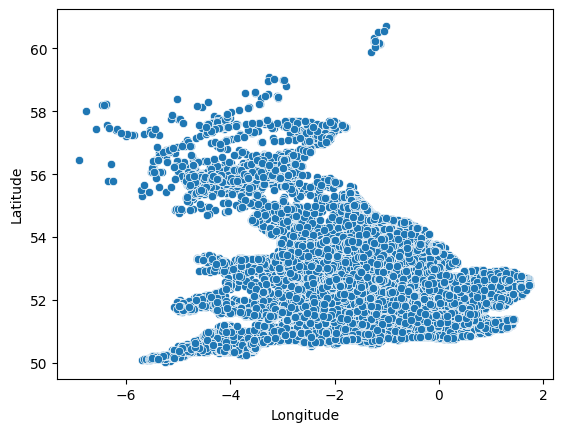

In [69]:
sns.scatterplot(data=df, x='Longitude', y='Latitude')

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [83]:
kmeans = KMeans(n_clusters=2, random_state=23, n_init="auto").fit(X_test)
kmeans.labels_

array([1, 0, 1, ..., 1, 0, 1], dtype=int32)

In [84]:
k = 5
clusters = {}
np.random.seed(23)

for idx in range(k):
    center = 2*(2*np.random.random((X_test.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : [] }

    clusters[idx] = cluster
clusters

{0: {'center': array([ 0.06919154,  1.78785042,  1.06183904, -0.87041662, -1.11581855,
          0.74488834, -1.33144319, -0.43023013,  0.47220939, -0.35227962,
         -1.99014048,  1.53612873,  1.53979015, -0.79836124,  0.35832746,
          1.91370766,  1.38037529, -1.73969824, -0.82102214, -0.84826224,
          1.28986536,  0.50473215, -1.55808914, -1.99788476,  1.76866493]),
  'points': []},
 1: {'center': array([-1.43399697, -0.3136139 , -0.61404224,  1.47914034, -0.28559275,
          1.31500594,  0.87140735, -1.52309322,  0.38553669, -1.48097481,
         -1.68986363,  1.32482102, -0.14245754, -1.35195008,  0.19190117,
          0.35394329,  1.09445268,  0.62338183,  0.23082704, -1.28701093,
         -1.03766588,  0.02421853, -0.4130172 , -0.06777926,  1.82295936]),
  'points': []},
 2: {'center': array([ 1.60640877,  0.02303729,  1.28280594,  1.3108637 , -1.07266661,
         -1.68377805, -0.13694829,  1.51590323, -1.40998777, -1.07499478,
          1.67178322, -1.48374589, 

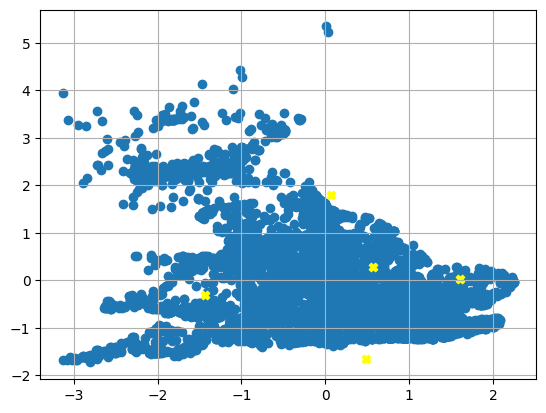

In [88]:
plt.scatter(X_test[:,0],X_test[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = 'X',c = 'yellow')
plt.show()

In [89]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [103]:
pred = kmeans.predict(X_test)
clusters = kmeans.cluster_centers_

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [ ]:
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = metrics.adjusted_rand_score(y_true, labels)
print("Adjusted Rand Index: %0.2f" % ari)

## Plot the data points with their predicted cluster center

IndexError: arrays used as indices must be of integer (or boolean) type

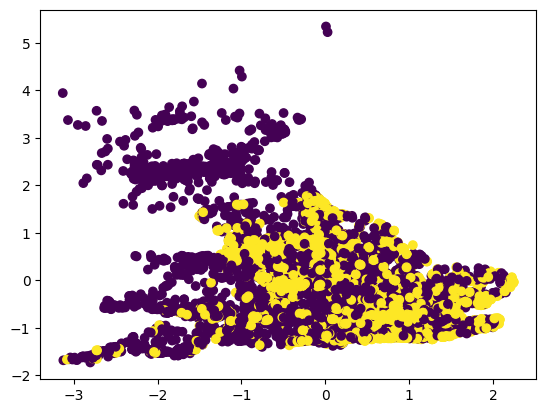

In [107]:
plt.scatter(X_test[:,0],X_test[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = 'X',c = 'red')
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

Justify Your Feature Selection:
I Suggested DBSCAN, There is unlabeld data
And there is a high density in data. but followed as stated as a requirement.

Evaluation:
I use Silhouette Coefficient and Adjusted Rand Index.